<a href="https://colab.research.google.com/github/manasik29/Simple_Linear_Regression-Assignment/blob/main/Simple_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***1) Delivery_time -> Predict delivery time using sorting time***

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

***Load Data***

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/delivery_time.csv')

In [34]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [48]:
#Renaming all columns
df = data.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'}, axis = 1)

In [69]:
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


***EDA***

In [50]:
#Correlation coef
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [6]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


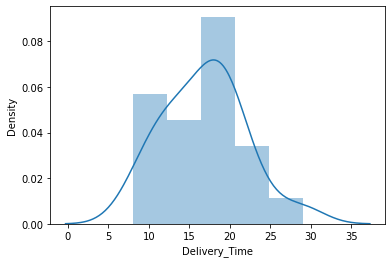

In [68]:
sns.distplot(df.Delivery_Time)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


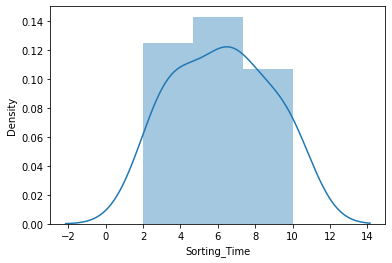

In [67]:
sns.distplot(df.Sorting_Time)

***Fitting a Regression Equation***

In [22]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [70]:
model = smf.ols("Delivery_Time~Sorting_Time", data=df).fit()

In [71]:
#model parameters
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [72]:
#get t-values & p-values
print(model.tvalues, '\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [73]:
#r squared value
model.rsquared

0.6822714748417231

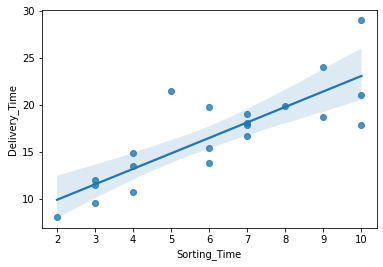

In [74]:
sns.regplot(x = "Sorting_Time", y = "Delivery_Time", data = df)

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 30 May 2022   Prob (F-statistic):           3.98e-06
Time:                        13:30:26   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Prediction***

In [75]:
#Predict Delivery Time for Sorting Time = 5, 10
newdata = pd.Series([5,10])

In [76]:
data_pred = pd.DataFrame(newdata, columns = ['Sorting_Time'])

In [77]:
data_pred

,Sorting_Time
0,5
1,10


In [78]:
model.predict(data_pred)

0    14.827833
1    23.072933
dtype: float64

***2) Salary_hike -> Build a prediction model for Salary_hike***

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

***Load Data***

In [80]:
data_s = pd.read_csv('/content/Salary_Data.csv')

In [81]:
data_s.shape

(30, 2)

In [82]:
data_s

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [83]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


***EDA***

In [85]:
#Correlation Coefficents
data_s.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


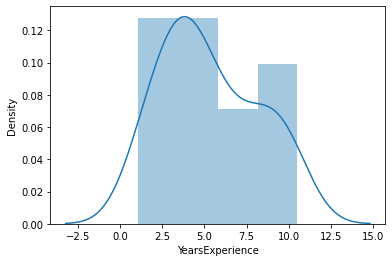

In [86]:
#plot histogram
sns.distplot(data_s.YearsExperience)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


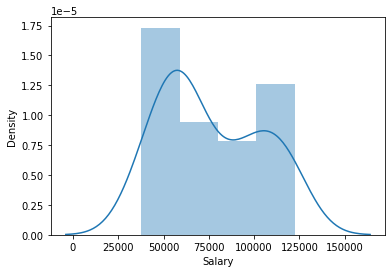

In [87]:
sns.distplot(data_s.Salary)

***Fitting a Regression model***

In [88]:
import statsmodels.formula.api as smf

In [94]:
model = smf.ols('Salary~YearsExperience', data = data_s).fit()

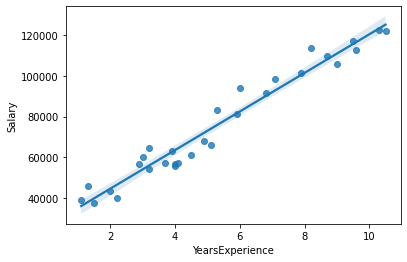

In [95]:
sns.regplot(x = 'YearsExperience', y = 'Salary', data = data_s)

In [90]:
#Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [92]:
#get t-values & p-values
print(model.tvalues, '\n' ,model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [93]:
#get rsquared value
(model.rsquared, model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

***Prediction***

In [96]:
#Get predicted value for YearsExperience = 5,10
newdata = pd.Series([5,10])

In [98]:
data_pred = pd.DataFrame(newdata, columns = ['YearsExperience'])

In [99]:
data_pred

,YearsExperience
0,5
1,10


In [100]:
model.predict(data_pred)

0     73042.011806
1    120291.823413
dtype: float64